This program classifies patients as having a Chronic Kidney Disease or not by using ML 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import keras as K
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [4]:
# load the data 
df = pd.read_csv ("/content/drive/MyDrive/MACHINE LEARNING- CKD/Data/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#review any potential unique values
#df.unique()

In [6]:
#get the shape of the data - menas no fo rows and columns 
df.shape

(400, 26)

In [7]:
# create a list of column names to keep 
columns_to_retain=['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']

# create a new dataset, the one we want to retain and drop the rest of the columns
df= df.drop([col for col in df.columns if not col in columns_to_retain],axis=1)

# drop the na or missing values 
df=df.dropna(axis=0)

In [8]:
# transform the non-numeric data in columns 
for column in df.columns:
  if df[column].dtype==np.number: #if it contains no value we continue 
    continue
  df[column]=LabelEncoder().fit_transform(df[column]) # if it doesnt we need to tranform that column - col into numbers

<ipython-input-8-0c8948014391>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number: #if it contains no value we continue


In [9]:
# first 5 rows for the new dataset 
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [10]:
# split the data into independent(features) to x dataset and y dependent (target) dataset 
X= df.drop(['classification'],axis=1)
y=df['classification'] # it creates the target we want 

In [11]:
# feature scaling use MinMaxScaler method the dataset so that all the features will lie between 0's and 1's 
x_scaler=MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]=x_scaler.transform(X)


In [12]:
#Split the data into 80% of training and 20 percent of testing & shuffle
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0, shuffle=True)

In [13]:
from keras.models import Sequential
from keras.layers import Dense 
# build the model
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
# Compile the model 
# loss function to check how well the model does in  traning 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])

In [15]:
#train the model = epocs is no of iteration over the entire dataset train on 
history =model.fit(X_train,y_train,epochs=10,batch_size=15)

Epoch 1/10
15/15 [==============================] - 3s 3ms/step - loss: 0.6762 - acc: 0.5488
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5688 - acc: 0.8372
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4802 - acc: 0.8930
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4062 - acc: 0.9070
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3433 - acc: 0.9163
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2912 - acc: 0.9209
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2509 - acc: 0.9209
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2185 - acc: 0.9349
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1940 - acc: 0.9395
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1740 - acc: 0.9442


In [16]:
test_loss, test_acc = model.evaluate(X_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - acc: 0.0000e+00


In [17]:
#
model.save('cdk.save')

Text(0.5, 0, 'epoch')

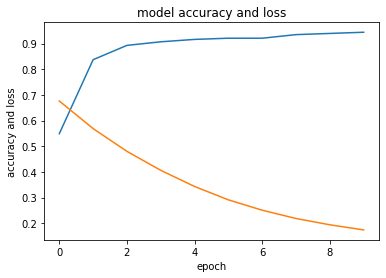

In [18]:
# visulaize the models loss and accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')


In [19]:
#get the shape of training and testing dataset 
print('Shape of training  data:', X_train.shape)
print('Shape of test data:', X_test.shape)

Shape of training  data: (215, 6)
Shape of test data: (72, 6)


In [20]:
# show the actual and predicted values 
pred= model.predict(X_test)
pred=[1 if y>0.5 else 0 for y in pred]
pred

print('Original : {0}'.format (" , ".join(str(x) for x in y_test)))
print('Original : {0}'.format (" , ".join(str(x) for x in pred)))

3/3 [==============================] - 0s 5ms/step
Original : 0 , 1 , 0 , 1 , 1 , 0 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 0
Original : 0 , 1 , 0 , 1 , 1 , 0 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 1


In [21]:
#show the actual values 
y_test

79     0
279    1
149    0
310    1
289    1
      ..
49     0
314    1
248    0
256    1
182    0
Name: classification, Length: 72, dtype: int64

In [22]:
#Preet
#import the Decision tree classifier model 
from sklearn.tree import DecisionTreeClassifier

In [23]:
# fit the model 
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# New Section
gini- it calculates the probability of a certain randomly selected feature that was classified incorrectly.

samples

values 

In [24]:
# predict the model
pred= model.predict(X_test)
pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0])

[Text(0.4444444444444444, 0.875, 'X[3] <= 0.69\ngini = 0.493\nsamples = 215\nvalue = [120, 95]'),
 Text(0.2222222222222222, 0.625, 'X[4] <= 0.731\ngini = 0.018\nsamples = 108\nvalue = [107, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 107\nvalue = [107, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'X[0] <= 0.625\ngini = 0.213\nsamples = 107\nvalue = [13, 94]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.7777777777777778, 0.375, 'X[5] <= 0.5\ngini = 0.021\nsamples = 95\nvalue = [1, 94]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 94\nvalue = [0, 94]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

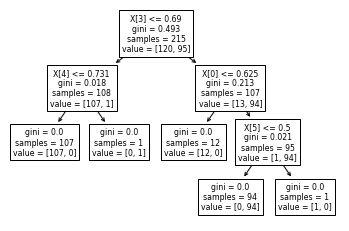

In [25]:
from  sklearn import tree 
tree.plot_tree(model)

In [26]:
# model's accuracy 
acc= accuracy_score(y_test,pred)
acc

0.9583333333333334

In [27]:
#SVM Enoc 

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0, shuffle=True)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm

In [30]:
svc = svm.SVC()

In [31]:
svc.fit(X_train, y_train)


SVC()

In [32]:
y_pred = svc.predict(X_test)
print("Accuracy Score : ")
print(accuracy_score(y_test, y_pred))

Accuracy Score : 
0.9722222222222222


In [33]:
confusion_matrix(y_test, y_pred)

array([[33,  2],
       [ 0, 37]])

In [34]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.95      1.00      0.97        37

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0, shuffle=True)

In [36]:
# KNN- Evelyn 
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#Intialize the model 
model = KNeighborsClassifier(n_neighbors=1)

In [38]:
# Train the model using the training sets
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=1)

In [39]:
# Make predictions on the test set
prediction= model.predict(X_test) 
print(prediction)

[0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0]


In [40]:
# Compute and print model's accuracy score
score = accuracy_score(y_test, prediction)
print('Accuracy score of model: ' + str(score))

Accuracy score of model: 0.9722222222222222


Hypertuning of KNN model with GridSearchCV

In [41]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score,  plot_confusion_matrix
import seaborn as sns

In [42]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

Defined dictionary of range of neighbors

In [43]:
k_range = list(range(1,31))
param_grid = dict(n_neighbors = k_range)

Instantiated GridSearchCV model

In [44]:
grid =  GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy', return_train_score=False, verbose =1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

Retrieve best optimal parameter of K 

In [45]:
grid.best_params_

{'n_neighbors': 1}

In [46]:
grid_pred = grid.predict(X_test)

In [47]:
accuracy_score = grid.best_score_*100
print("New Accuracy score with GridSearchCV tuning : {:.2f}%".format(accuracy_score))


New Accuracy score with GridSearchCV tuning : 99.52%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


([<matplotlib.axis.YTick at 0x7f23c7198430>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

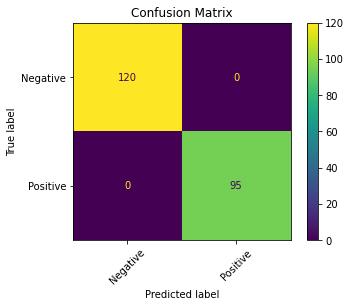

In [48]:
plot_confusion_matrix(grid,X_train, y_train,values_format='d')
plt.title('Confusion Matrix')
classNames = ['Negative', 'Positive']
tick_marks =np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation = 45)
plt.yticks(tick_marks,classNames)

